In [6]:
import pandas as pd

df = pd.read_csv('iot_sensor_dataset.csv')

df.head(10)

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
5,110,3,3,4,6,1,21,4,1,0
6,100,7,5,6,4,1,77,4,1,0
7,31,1,5,4,5,4,21,4,1,0
8,180,7,4,6,3,3,31,4,1,0
9,2800,0,3,3,7,0,39,3,1,0


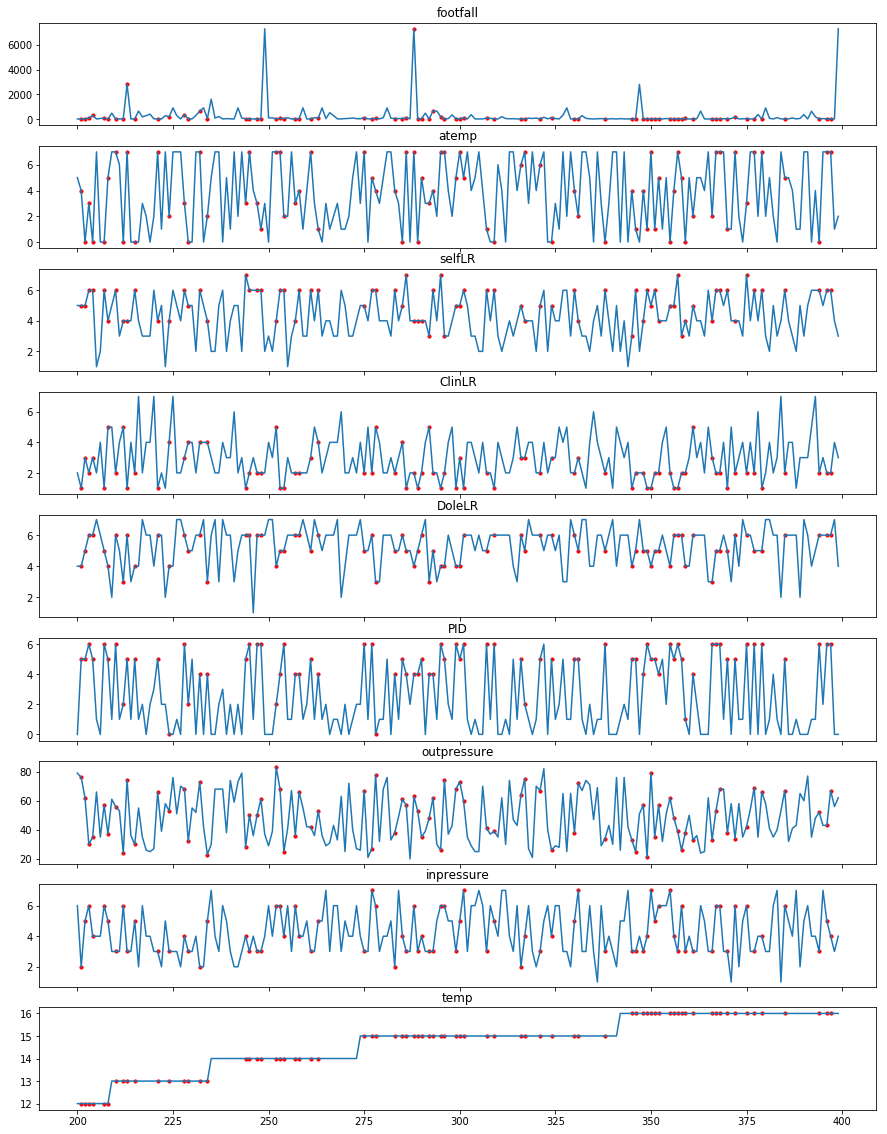

In [7]:
# Requires Matplotlib:
# (torch) conda install matplotlib
import matplotlib.pyplot as plt

range_start = 200
range_end = 400
X = df.iloc[range_start:range_end, :-1]
y = df.iloc[range_start:range_end, -1]

fig, axes = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(15, 20), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, X.columns):
    ax.plot(X.loc[:, col]) # plot whole series
    ax.scatter(X.loc[y == 1, col].index, X.loc[y == 1, col].values, color='red', s=10) # overlay failed points
    ax.set_title(col)

In [8]:
df = pd.read_csv('iot_sensor_dataset.csv')

df_first_20_rows = df.iloc[:20, :-1]
print(df_first_20_rows.shape)
df_first_20_rows

(20, 9)


,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1
5,110,3,3,4,6,1,21,4,1
6,100,7,5,6,4,1,77,4,1
7,31,1,5,4,5,4,21,4,1
8,180,7,4,6,3,3,31,4,1
9,2800,0,3,3,7,0,39,3,1


In [11]:
from data import get_data

# Read dataset and reshape it for training with RNN
X_train, X_test, y_train, y_test = get_data(sequence_length=10, normalize=False)

print(X_train.shape) # batch, sequence_len, input_size

print(X_train[:3, :, :]) # print first 3 entries of windowed data

torch.Size([699, 10, 9])
tensor([[[   0,    7,    7,    1,    6,    6,   36,    3,    1],
         [ 190,    1,    3,    3,    5,    1,   20,    4,    1],
         [  31,    7,    2,    2,    6,    1,   24,    6,    1],
         [  83,    4,    3,    4,    5,    1,   28,    6,    1],
         [ 640,    7,    5,    6,    4,    0,   68,    6,    1],
         [ 110,    3,    3,    4,    6,    1,   21,    4,    1],
         [ 100,    7,    5,    6,    4,    1,   77,    4,    1],
         [  31,    1,    5,    4,    5,    4,   21,    4,    1],
         [ 180,    7,    4,    6,    3,    3,   31,    4,    1],
         [2800,    0,    3,    3,    7,    0,   39,    3,    1]],

        [[ 190,    1,    3,    3,    5,    1,   20,    4,    1],
         [  31,    7,    2,    2,    6,    1,   24,    6,    1],
         [  83,    4,    3,    4,    5,    1,   28,    6,    1],
         [ 640,    7,    5,    6,    4,    0,   68,    6,    1],
         [ 110,    3,    3,    4,    6,    1,   21,    4,    1]

In [10]:
get_data?

RNN(
  (rnn): LSTM(9, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)
model training loss 0.23991495370864868
model training epoch 803
Wall time: 5.02 ms


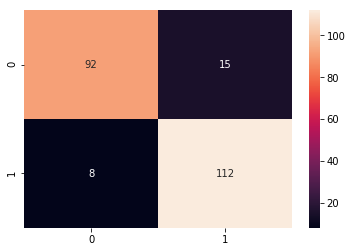

In [21]:
# Requires seaborn
# (torch) conda install seaborn
import seaborn as sns

import numpy as np
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix

from eval import load_model

X_train, X_test, y_train, y_test = get_data(sequence_length=10)
input_size = X_train.shape[2] # batch, seq_len, input_size

model = load_model(input_size)
inputs = Variable(X_test.float())

outputs = %%time model(inputs)

# convert probabilities => 0 or 1
y_pred = (outputs.detach().numpy() > 0.5).astype(np.int)

cm = confusion_matrix(y_test.values, y_pred)
sns.heatmap(cm, annot=True, fmt='d')